## step1: load the images

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def random_image(test_train,yes_no):
  if test_train=='train' and yes_no=='yes':
    path = '/content/drive/MyDrive/brain_tumor_train/train/yes'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='train' and yes_no=='no':
    path = '/content/drive/MyDrive/brain_tumor_train/train/no'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='test' and yes_no=='yes':
    path = '/content/drive/MyDrive/brain_tumor_train/test/yes'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='test' and yes_no=='no':
    path = '/content/drive/MyDrive/brain_tumor_train/test/no'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  else:
    print("no such file or directory")

Y148.JPG


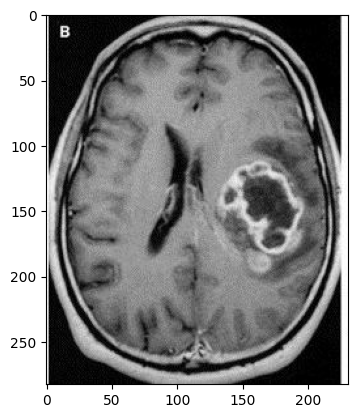

In [63]:
random_image('train','yes')

5 no.jpg


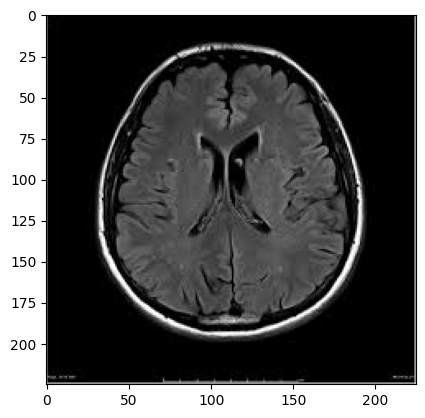

In [64]:
random_image('test','no')

Y153.jpg
N20.JPG
Y6.jpg
2 no.jpeg


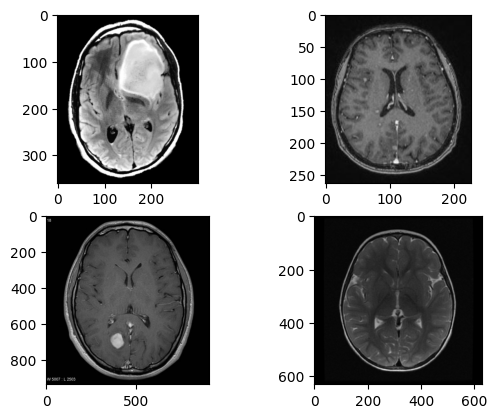

In [65]:
#visualize random images side by side
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2,2,1)
random_image('train','yes')
plt.subplot(2,2,2)
random_image('train','no')
plt.subplot(2,2,3)
random_image('test','yes')
plt.subplot(2,2,4)
random_image('test','no')

## step2: preprocess the images

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#normalization of data values to 0 and 1, increases speed of calculation and speed of convolution of kernals
train_datagen=ImageDataGenerator(rescale=1./255) #divide all the pixel values by 255
valid_datagen=ImageDataGenerator(rescale=1./255) #divide all the pixel values by 255

#setup paths to directories
train_dir="/content/drive/MyDrive/brain_tumor_train/train"
test_dir="/content/drive/MyDrive/brain_tumor_train/test"

#import data from directories
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#building the CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_4=tf.keras.models.Sequential()

#convolution
model_4.add(Conv2D(filters=128,
                   kernel_size=10,
                   activation="tanh",
                   input_shape=(224,224,3)))

#first downsampling
model_4.add(Conv2D(filters=64,
                   kernel_size=5,
                   activation="relu"))

model_4.add(MaxPooling2D(pool_size=2
                         ,padding="valid"))

#second downsampling
model_4.add(Conv2D(filters=64,
                   kernel_size=3,
                   activation="relu"))
model_4.add(MaxPooling2D(2))

#third downsampling
model_4.add(Conv2D(filters=32,
                   kernel_size=3,
                   activation="relu"))
model_4.add(MaxPooling2D(2))

#fourth downsampling
model_4.add(Conv2D(filters=16,
                   kernel_size=3,
                   activation="relu"))
model_4.add(MaxPooling2D(2))
#convolution
model_4.add(Conv2D(filters=16,
                   kernel_size=2,
                   activation="relu"))

#fifth downsampling
model_4.add(Conv2D(filters=8,
                   kernel_size=3,
                   activation="relu"))
model_4.add(MaxPooling2D(2))
#flattening layers
model_4.add(Flatten())

#dense layers
model_4.add(Dense(124,activation="relu"))
model_4.add(Dense(64,activation="relu"))
#output layer
model_4.add(Dense(1,activation="sigmoid"))



Found 233 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## step3: compiling the model

In [67]:
model_4.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

## step4: compile the model

In [68]:
history_4=model_4.fit(train_data,
                     epochs=20,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Epoch 1/20
8/8 [==============================] - 5s 337ms/step - loss: 0.6714 - accuracy: 0.6223 - val_loss: 0.6821 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 3s 304ms/step - loss: 0.6325 - accuracy: 0.6910 - val_loss: 0.6674 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 3s 311ms/step - loss: 0.5894 - accuracy: 0.6567 - val_loss: 0.6673 - val_accuracy: 0.5500
Epoch 4/20
8/8 [==============================] - 3s 305ms/step - loss: 0.5323 - accuracy: 0.7082 - val_loss: 0.6585 - val_accuracy: 0.7000
Epoch 5/20
8/8 [==============================] - 3s 301ms/step - loss: 0.5355 - accuracy: 0.7468 - val_loss: 0.6281 - val_accuracy: 0.6000
Epoch 6/20
8/8 [==============================] - 3s 305ms/step - loss: 0.4679 - accuracy: 0.7768 - val_loss: 0.7106 - val_accuracy: 0.6500
Epoch 7/20
8/8 [==============================] - 3s 312ms/step - loss: 0.4642 - accuracy: 0.8155 - val_loss: 0.7305 - val_accuracy: 0.5000
Epoch 8/20
8/8 [====

In [69]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 215, 215, 128)     38528     
                                                                 
 conv2d_37 (Conv2D)          (None, 211, 211, 64)      204864    
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 105, 105, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 103, 103, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 51, 51, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 49, 49, 32)       

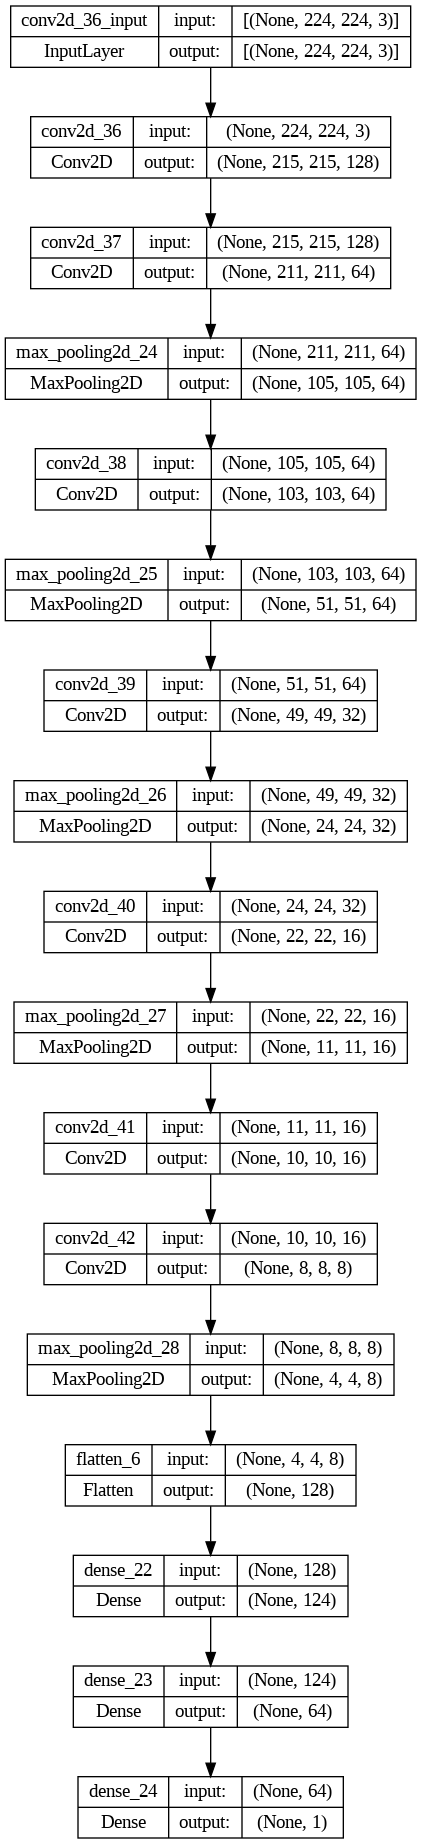

In [70]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)